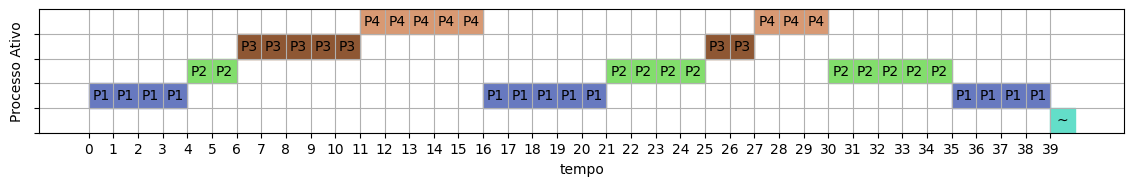

In [35]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy


#abrir arquivo e criar listas
file = open("saida.txt")

processo_por_tempo = [] #lista de processos ativos por tempo
for x in file.readlines():
    processo_por_tempo.append(int(x))
n_processos = len(set(processo_por_tempo))
tempos = [i for i in range(len(processo_por_tempo))]

# tempo_ativo_processo = [ [] for i in range(n_processos)] #lista de tempos onde o processo esteve ativo
# for p in range(len(processo_por_tempo)):
#     tempo_ativo_processo[processo_por_tempo[p]].append(p)

# print(tempo_ativo_processo)
# #

# y = numpy.random.randint(20,size=10)
# # print(impar,par,y)
# plt.eventplot(positions=tempo_ativo_processo,
#              lineoffsets=[i for i in range(n_processos)],linewidth=[15 for i in range(n_processos)]
#               ,linelengths=[0.4 for i in range(n_processos)]
#              )
# plt.show()
pontos = [i for i in zip(tempos,processo_por_tempo)]


# Plotando gráfico

#Gerando n cores aleatorias
cores = []
for i in range(n_processos):
    cores.append(colors.to_rgb(numpy.random.rand(1,3)))
# definindo funcao que preenche o quadrado
def preenche(x,y,cor):
    plt.fill_between([x,x+1],y,y+1,color=cor)
    if(y):
        texto = 'P'+ chr(ord('1')+y-1)
    else:
        texto = '~'
    plt.text(numpy.average([x,x+1]),numpy.average([y,y+1]),
             texto,horizontalalignment='center',
             verticalalignment='center')
    
#Criando grafico
fig = plt.figure(figsize=[14,8])
ax = fig.add_subplot(111)
# ax.axes.get_yaxis().set_visible(False)
ax.set_aspect(1)

for ponto in pontos:
    x,y = ponto
    #preencher o quadrado certo
    preenche(x,y,cores[y])


plt.ylim(0,n_processos)
ax.set_xticks(range(0,len(tempos)))
ax.set_yticks(range(0,n_processos))
ax.set_yticklabels([])
ax.grid(which="both")
plt.xlabel("tempo")
plt.ylabel("Processo Ativo")

plt.savefig(fname="teste.png")
plt.show()
